In [2]:
import sys
sys.path.append(r'.\..')

from functions import Elements,Impurete_Elements,ONO_Elements,Ferrite_Elements,THIELMANN_Elements
from functions import MAYER_Elements,Indicateurs,Impurete,Ferrite,ONO,THIELMANN,MAYER,Quality_ref

from functions import compute_correlation,compute_mean_absolute_correlation,print_correlation_results
from functions import linear_regression_with_predict_intervals
from functions import plot_linear_regression_with_predict_intervals
from functions import  compute_confidence_interval,export_IC_data
from functions import remove_outliers,export_outliers_and_cleaned_data,plot_and_save
from functions import fusion_and_clean_excel_files,add_quality,keep_GS_and_add_quality,split_GS

In [3]:
# Chemins des fichiers Excel à fusionner
files_list = [r'..\data\données brut\TRACTION2023.xlsx',
              r'..\data\données brut\TRACTION2024.xlsx']

# choix de la recette
recipe_name = 'GS 450-10'

### Le pre-traitement

In [4]:
# Lancement du pre-traitement
df = fusion_and_clean_excel_files(files_list)
df = keep_GS_and_add_quality(df)

df_nonconforme, df_conforme = split_GS(recipe_name, df)

### Sélection/Classement des 5 indicateurs qualités

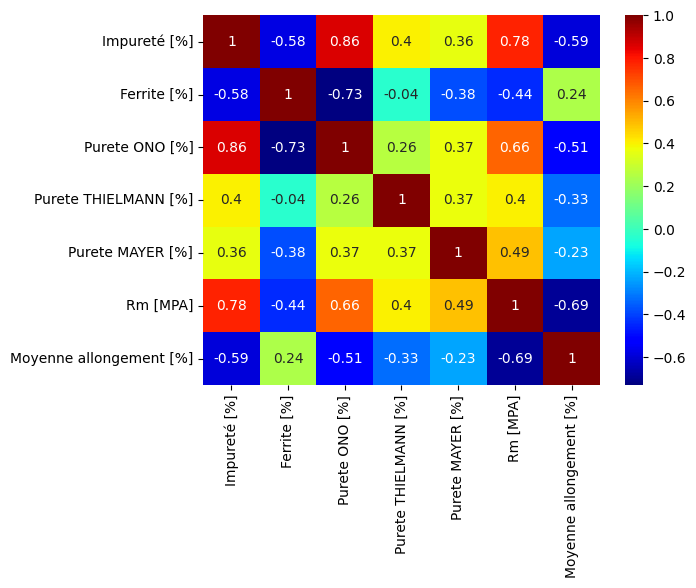

In [5]:
file_name = "Matrice_corrélation_qualite_indicateur.pdf"
corr_matrix = compute_correlation(df_conforme , Indicateurs, Quality_ref,plot=True, file_path =file_name)

In [6]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, Indicateurs, Quality_ref)
print_correlation_results(Quality_ref, corr_matrix_sorted)

Résultats de la corrélation entre Rm [MPA], Moyenne allongement [%] et les autres variables :
   Impureté [%]: 0.6843073603777317
   Purete ONO [%]: 0.5807873742478454
   Purete THIELMANN [%]: 0.3638100292862516
   Purete MAYER [%]: 0.362728333531523
   Ferrite [%]: 0.339176951731638


### Sélection/Classement des éléments chimiques

#### Impureté

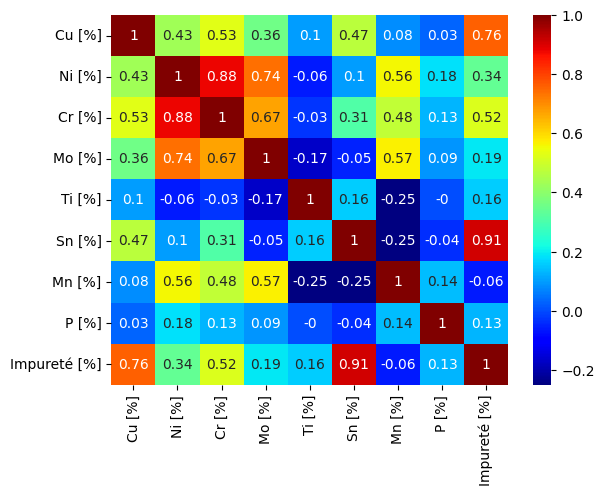

In [7]:
file_name = "Matrice_corrélation_Impurete_Elements.pdf"
corr_matrix = compute_correlation(df_conforme, Impurete_Elements, Impurete,plot=True, file_path =file_name)

In [8]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, Impurete_Elements, Impurete)
print_correlation_results(Impurete, corr_matrix_sorted)

Résultats de la corrélation entre Impureté [%] et les autres variables :
   Sn [%]: 0.910209093550116
   Cu [%]: 0.7597504459424971
   Cr [%]: 0.517777383922081
   Ni [%]: 0.3391189892408084
   Mo [%]: 0.18653216423918936
   Ti [%]: 0.16471239881065639
   P [%]: 0.13060253368060015
   Mn [%]: 0.05554303461303327


#### Purete ONO

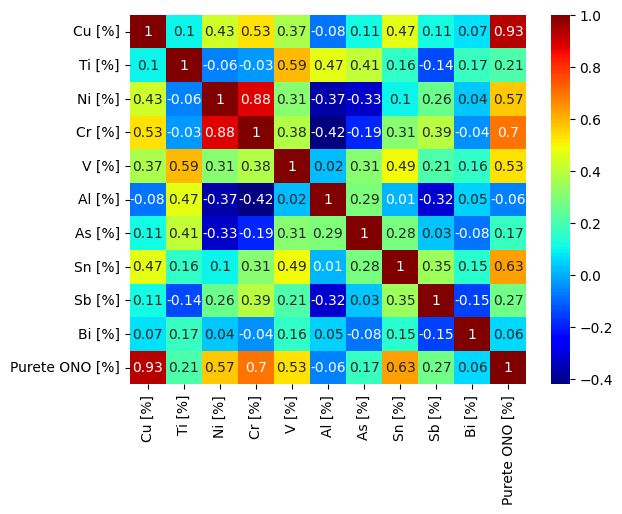

In [9]:
file_name = "Matrice_corrélation_ONO_Elements.pdf"
corr_matrix = compute_correlation(df_conforme, ONO_Elements, ONO,plot=True, file_path =file_name)

In [10]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, ONO_Elements, ONO)
print_correlation_results(ONO, corr_matrix_sorted)

Résultats de la corrélation entre Purete ONO [%] et les autres variables :
   Cu [%]: 0.9292528212951635
   Cr [%]: 0.6950188400706386
   Sn [%]: 0.6281801664574482
   Ni [%]: 0.5665694287466708
   V [%]: 0.5313324416383289
   Sb [%]: 0.2728985609207925
   Ti [%]: 0.21386332474998163
   As [%]: 0.17078901930382373
   Al [%]: 0.05873536330692485
   Bi [%]: 0.05705089461301191


#### Ferrite

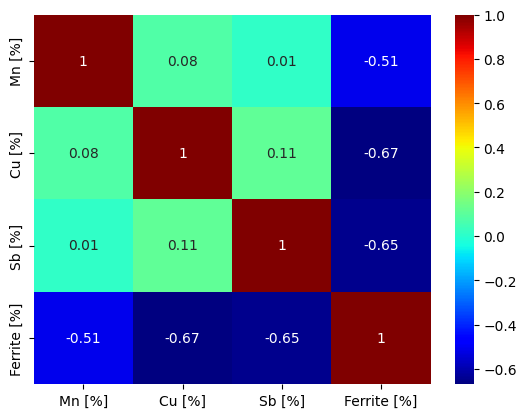

In [11]:
file_name = "Matrice_corrélation_Ferrite_Elements.pdf"
corr_matrix = compute_correlation(df_conforme, Ferrite_Elements, Ferrite,plot=True,file_path =file_name)

In [12]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, Ferrite_Elements, Ferrite)
print_correlation_results(Ferrite, corr_matrix_sorted)

Résultats de la corrélation entre Ferrite [%] et les autres variables :
   Cu [%]: 0.6689875887524637
   Sb [%]: 0.6513824883108691
   Mn [%]: 0.5141049272897803


#### Purete THIELMANN

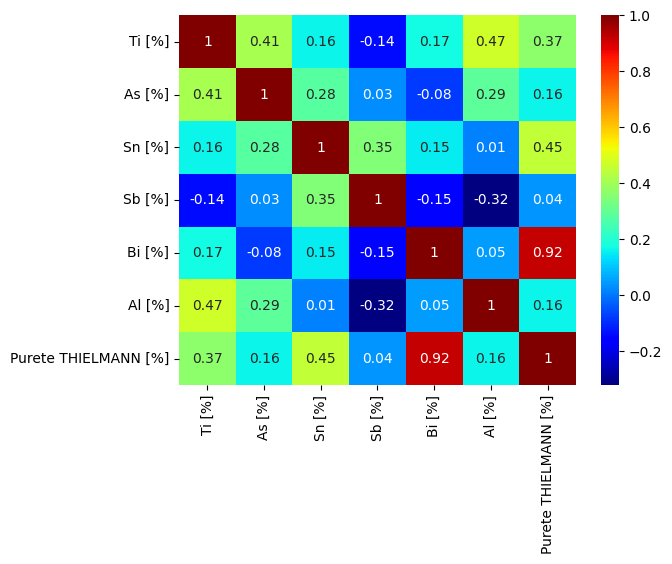

In [13]:
file_name = "Matrice_corrélation_THIELMANN_Elements.pdf"
corr_matrix = compute_correlation(df_conforme, THIELMANN_Elements, THIELMANN,plot=True,file_path =file_name)

In [14]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, THIELMANN_Elements, THIELMANN)
print_correlation_results(THIELMANN, corr_matrix_sorted)

Résultats de la corrélation entre Purete THIELMANN [%] et les autres variables :
   Bi [%]: 0.9172408878269117
   Sn [%]: 0.454865229866959
   Ti [%]: 0.3700798553335584
   Al [%]: 0.16115946756167712
   As [%]: 0.1563438292529048
   Sb [%]: 0.0407452943896288


#### Purete MAYER

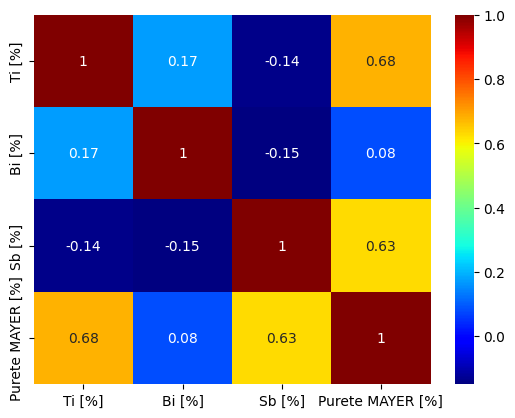

In [15]:
file_name = "Matrice_corrélation_MAYER_Elements.pdf"
corr_matrix = compute_correlation(df_conforme, MAYER_Elements, MAYER,plot=True, file_path =file_name)

In [16]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, MAYER_Elements, MAYER)
print_correlation_results(MAYER, corr_matrix_sorted)

Résultats de la corrélation entre Purete MAYER [%] et les autres variables :
   Ti [%]: 0.6794867756705938
   Sb [%]: 0.630243577025561
   Bi [%]: 0.07927655826760512


### Gestions des valeurs extrême

In [17]:
output_dir = r'..\data\données nettoyées'
df_conforme_without_outliers = export_outliers_and_cleaned_data(df_conforme, recipe_name, output_dir)

In [18]:
y_column = 'Impureté [%]'
plot_and_save(df_conforme, y_column,save = True)

### Regression linéaire

##### Impurete et les elements chimique Sn, Cu

In [19]:
x_name, y_name = 'Sn [%]','Impureté [%]'
width=1
file_name = 'Regression_Impurete_Sn.pdf'
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [20]:
x_name, y_name = 'Cu [%]','Impureté [%]'
width=1.96
file_name = 'Regression_Impurete_Cu.pdf'
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

##### Ono et les elements Cu, Cr

In [21]:
x_name, y_name, file_name = 'Cu [%]','Purete ONO [%]','Regression_Ono_Cu.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [22]:
x_name, y_name = 'Cr [%]','Purete ONO [%]'
width=1.96
file_name = 'Regression_Ono_Cr.pdf'
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

##### Rm et les elements Cu, Sn, Cr

In [23]:
x_name, y_name, file_name = 'Cu [%]','Rm [MPA]','Regression_Cu_Rm.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [24]:
x_name, y_name, file_name = 'Sn [%]','Rm [MPA]','Regression_Sn_Rm.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [25]:
x_name, y_name, file_name = 'Cr [%]','Rm [MPA]','Regression_Cr_Rm.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

##### Allongement et les elments Cu, Sn, Cr

In [26]:
x_name, y_name, file_name = 'Cu [%]','Moyenne allongement [%]','Regression_Cu_Allongement.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [27]:
x_name, y_name, file_name = 'Sn [%]','Moyenne allongement [%]','Regression_Sn_Allongement.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

In [28]:
x_name, y_name, file_name = 'Cr [%]','Moyenne allongement [%]','Regression_Cr_Allongement.pdf'
width=1.96
plot_linear_regression_with_predict_intervals(df_conforme_without_outliers,x_name, y_name, width, file_name)

### Intervalle de confiance

Exportation des intervalles de confiance

In [29]:
output_dir = r'..\data\données nettoyées'
IC_column = ['Impureté [%]',  'Purete ONO [%]'] + Elements
export_IC_data(recipe_name, output_dir,df_conforme_without_outliers,IC_column, confidence=1.96)

Impureté

In [28]:
column = 'Impureté [%]'
compute_confidence_interval( df_conforme_without_outliers, column, confidence=0.95)

(1.1242013153447263, 1.1829861846552736)

Ono

In [29]:
column = 'Purete ONO [%]'
compute_confidence_interval(df_conforme_without_outliers, column, confidence=0.95)

(0.14475388708262038, 0.1533711129173796)

#### Elements chimiques

In [30]:
column = 'Sn [%]'
compute_confidence_interval(df_conforme_without_outliers, column, confidence=0.95)

(0.014300931911039863, 0.015261568088960136)

In [31]:
column = 'Mg [%]'
compute_confidence_interval(df_conforme_without_outliers, column, confidence=0.95)

(0.03592126990740905, 0.03945373009259095)